In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

# Image File Renaming and Merging Sub-Folders Data

In [2]:
#### Image File Renaming Utility to Automate the image file names and copying the renamed images into 1 0f 3 
# classes / lables respectively: This code was run once to do the job !

# --------------------------------------------------------------------------------------------#
"""
path = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL'
data_dir_list = os.listdir(path) # converting class folder names to list
#print(data_dir_list)
no_images=0
img=0

for dataset in data_dir_list:                          # to dataset subfolder/class name
    img_list = os.listdir(path + '/' + dataset)        # accessing images' names of subfolder as list
    new_dir_AMD = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/AMD'
    new_dir_DME = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/DME'
    new_dir_NORMAL = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/NORMAL'

for img in img_list:
        old_name = path + '/' + dataset + '/' + img
        new_name = dataset + "_" + img 
        if dataset[0]==  'A':
            dst1 = new_dir_AMD + '/' + new_name
 
        if dataset[0]==  'D':
            dst1 = new_dir_DME + '/' + new_name
        
        if dataset[0]==  'N':
            dst1 = new_dir_NORMAL + '/' + new_name
        
        os.rename(old_name, dst1)        # e.g. image 01.tif from subfolder AMD1 is renamed to AMD1_01.tif  """   
        


'\npath = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL\'\ndata_dir_list = os.listdir(path) # converting class folder names to list\n#print(data_dir_list)\nno_images=0\nimg=0\n\nfor dataset in data_dir_list:                          # to dataset subfolder/class name\n    img_list = os.listdir(path + \'/\' + dataset)        # accessing images\' names of subfolder as list\n    new_dir_AMD = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/AMD\'\n    new_dir_DME = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/DME\'\n    new_dir_NORMAL = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/NORMAL\'\n\nfor img in img_list:\n        old_name = path + \'/\' + dataset + \'/\' + img\n        new_name = dataset + "_" + img \n        if dataset[0]==  \'A\':\n            dst1 = new_dir_AMD + \'/\' + new_name\n \n        if dataset[0]==  \'D\'

# Spliting Data/Folders into train, validation and test 

In [3]:
#import splitfolders
#splitfolders.ratio('D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New', output="OCT_test_val_train_Dataset_TL", seed=1337, ratio=(0.7,0.1,0.2)) 

#Uncomment code to split dataset (train:val:test --> 0.7:0.1:0.2)

In [4]:
train_data_dir = "D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_test_val_train_Dataset_TL/train"
val_data_dir = "D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_test_val_train_Dataset_TL/val"
test_data_dir = "D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_test_val_train_Dataset_TL/test"

		AMD:  723 	DME:  1101 	NORMAL:  1407 

	Total Images:  3231


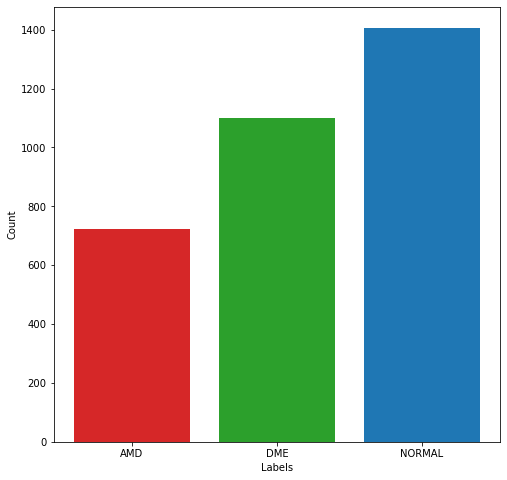

In [5]:
data_dir = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New'

data_dir_list = os.listdir(data_dir)

no_images=0
for dataset in data_dir_list:
    if dataset[0] == 'A':
        amd_images = len(os.listdir(data_dir + '/' + dataset))

    if dataset[0] == 'D':
        dme_images = len(os.listdir(data_dir + '/' + dataset))
    
    if dataset[0] == 'N':
        normal_images = len(os.listdir(data_dir + '/' + dataset))

print('\t\tAMD: ' , amd_images, '\tDME: ', dme_images, '\tNORMAL: ', normal_images, '\n\n\tTotal Images: ', amd_images + dme_images + normal_images)

data= {'AMD': amd_images, 'DME': dme_images, 'NORMAL': normal_images}
labels = list(data.keys()) 
count = list(data.values()) 

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.bar(labels, count, color=['tab:red', 'tab:green', 'tab:blue'])
plt.axis('on')
plt.xlabel("Labels") 
plt.ylabel("Count") 
plt.savefig('labels_vs_counts.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()


# VGG-16 Model, with the Final Fully-Connected Layers Removed

In [6]:
img_width, img_height = 150, 150 
channels = 3
batch_size = 32

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(include_top= False, input_shape= (img_width, img_height, channels), weights= 'imagenet')
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Data Pre-Processing and Feature Extraction with Image Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    zoom_range= (0.73, 0.9),
    horizontal_flip= True,
    rotation_range= 10,
    width_shift_range= 0.10,
    fill_mode= 'constant',
    height_shift_range= 0.10,   
    brightness_range= (0.55, 0.9),
)

valid_test_datagen = ImageDataGenerator(
    rescale= 1./255, 
)

In [9]:
print('training data:')

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,  
    class_mode= 'categorical',
    shuffle= True, 
    seed= 1337
) 

print('\nvalidation data:')

valid_generator = valid_test_datagen.flow_from_directory(
    val_data_dir,
    target_size= (img_width, img_height),
    color_mode= 'rgb',
    batch_size= batch_size,  
    class_mode= 'categorical',
    shuffle= True, 
    seed= 1337
)

print('\ntest data:')

test_generator = valid_test_datagen.flow_from_directory(  
    test_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,        
    class_mode= 'categorical',
    shuffle= False, 
)

training data:
Found 2260 images belonging to 3 classes.

validation data:
Found 322 images belonging to 3 classes.

test data:
Found 649 images belonging to 3 classes.


In [10]:
'''from tensorflow.keras.utils import to_categorical

num_classes = len(train_generator.class_indices)  
train_labels = train_generator.classes 
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = valid_generator.classes 
valid_labels = to_categorical(valid_labels, num_classes=num_classes)'''
nb_train_samples = len(train_generator.filenames)  
nb_valid_samples = len(valid_generator.filenames)
nb_test_samples = len(test_generator.filenames)

#  Model Architecture

In [11]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential


model = Sequential()

for layer in vgg16.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable= False

model.add(Flatten(input_shape= (4, 4, 512)))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

# Compile the Model

In [12]:
from tensorflow.keras.optimizers import Adam

optimizers = Adam(learning_rate= 0.0001)
model.compile(optimizer= optimizers, loss= 'categorical_crossentropy', 
              metrics= ['acc'])

# Helper Functions

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'baseline_model.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
)

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode='auto'
)

csvlogger = CSVLogger(
    filename= "baseline_training_csv.log",
    separator = ",",
    append = False
)

reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint, earlystop, csvlogger,reduceLR]

# Train the Model

In [14]:
history = model.fit(
    train_generator, 
    epochs = 30,
    steps_per_epoch = nb_train_samples//batch_size,
    validation_data = valid_generator, 
    validation_steps = nb_valid_samples//batch_size,
    verbose = 2,
    callbacks = callbacks,
    shuffle = True
)

Epoch 1/30
70/70 - 317s - loss: 0.9721 - acc: 0.5184 - val_loss: 0.8025 - val_acc: 0.6531

Epoch 00001: val_loss improved from inf to 0.80251, saving model to baseline_model.h5
Epoch 2/30
70/70 - 379s - loss: 0.7871 - acc: 0.6427 - val_loss: 0.6876 - val_acc: 0.7563

Epoch 00002: val_loss improved from 0.80251 to 0.68756, saving model to baseline_model.h5
Epoch 3/30
70/70 - 322s - loss: 0.6762 - acc: 0.7334 - val_loss: 0.6141 - val_acc: 0.7688

Epoch 00003: val_loss improved from 0.68756 to 0.61415, saving model to baseline_model.h5
Epoch 4/30
70/70 - 311s - loss: 0.6098 - acc: 0.7590 - val_loss: 0.5657 - val_acc: 0.8031

Epoch 00004: val_loss improved from 0.61415 to 0.56569, saving model to baseline_model.h5
Epoch 5/30
70/70 - 317s - loss: 0.5532 - acc: 0.7908 - val_loss: 0.5289 - val_acc: 0.8125

Epoch 00005: val_loss improved from 0.56569 to 0.52895, saving model to baseline_model.h5
Epoch 6/30
70/70 - 314s - loss: 0.5158 - acc: 0.8039 - val_loss: 0.4980 - val_acc: 0.8313

Epoch 00

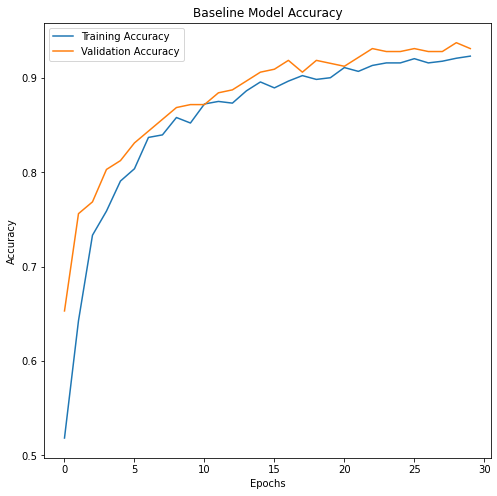

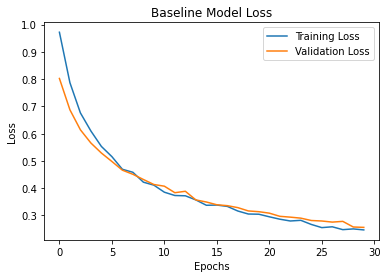

In [15]:
plt.subplot()
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.title('Baseline Model Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('baseline_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

plt.subplot()
plt.title('Baseline Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('baseline_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

In [16]:
(eval_loss, eval_accuracy) = model.evaluate(test_generator, batch_size= batch_size, verbose= 1)
print('Test Loss: ', eval_loss)
print('Test Accuracy: ', eval_accuracy)

21/21 [==============================] - 74s 4s/step - loss: 0.2366 - acc: 0.9353
Test Loss:  0.23659078776836395
Test Accuracy:  0.9352850317955017


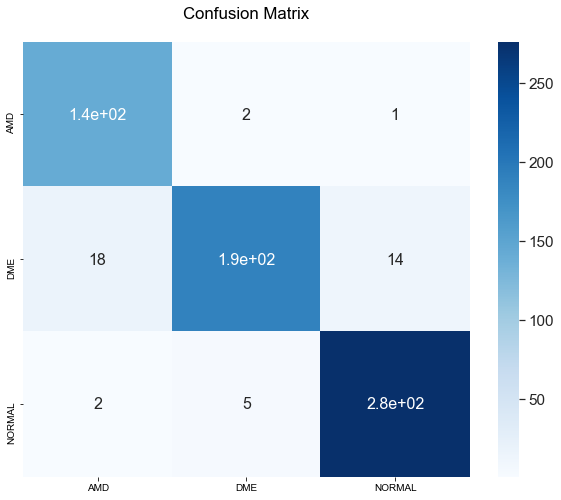

Classification Report

              precision    recall  f1-score   support

         AMD       0.88      0.98      0.93       145
         DME       0.96      0.86      0.91       221
      NORMAL       0.95      0.98      0.96       283

    accuracy                           0.94       649
   macro avg       0.93      0.94      0.93       649
weighted avg       0.94      0.94      0.93       649



In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

Y_pred = model.predict(test_generator, nb_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(cm, list(test_generator.class_indices.keys()), list(test_generator.class_indices.keys()))
fig, ax = plt.subplots(figsize=(10,8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues)
plt.title('Confusion Matrix\n')
plt.savefig('confusion_matrix.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

print('Classification Report\n')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))